<img src="images/forest.png" alt="drawing" width="1000"/>

# **Random Forest**

As the *Random Forest* model is an ensamble Tree model, it shares a lot of hyperparmameters with a *Decision Tree* model. The additional  hyperparameters unique to a *Random Forest* model are:
* **Number of Estimators** (number of trees)
* **Number of Features** (number of features $m$ to include per subset of features)
* **Bootstrap Samples** (allow bootstrap sampling of each subset of features)
* **Out-Of-Bag (OOB) Error** (calculate OOB Error)



In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error, mean_squared_error

## Random Forest Classification

### Random Forest Classifier Model

In [50]:
penguins = pd.read_csv("data/penguins_size.csv")
penguins = penguins.dropna()
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [51]:
y = penguins['species']

X = penguins.drop('species', axis='columns')
X = pd.get_dummies(X, drop_first=True)
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True,False,True
1,39.5,17.4,186.0,3800.0,False,True,True,False
2,40.3,18.0,195.0,3250.0,False,True,True,False
4,36.7,19.3,193.0,3450.0,False,True,True,False
5,39.3,20.6,190.0,3650.0,False,True,False,True


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

At each node split a random subset of features is chosen to base the split off. In the model definition a <code>random_state</code> parameter may be passed, which will ensure that the same "random" selection is made each time you run the model.

In [53]:
rfc_model = RandomForestClassifier(
    n_estimators=10, 
    max_features='sqrt',
    random_state=101
)

rfc_model.fit(X_train, y_train)
y_pred = rfc_model.predict(X_test)

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



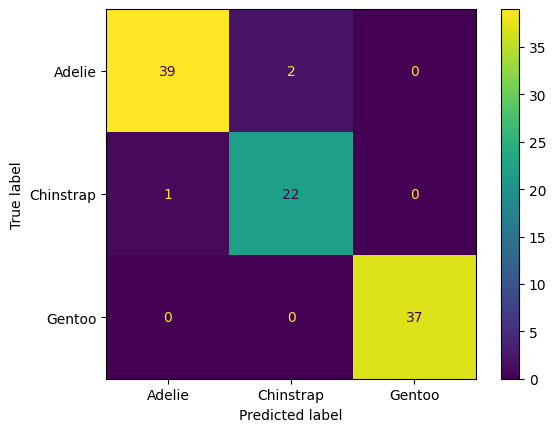

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(classification_report(y_test, y_pred))

### Random Forest Classifier Model - With Grid Search

In [55]:
data = pd.read_csv('data/data_banknote_authentication.csv')
data.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


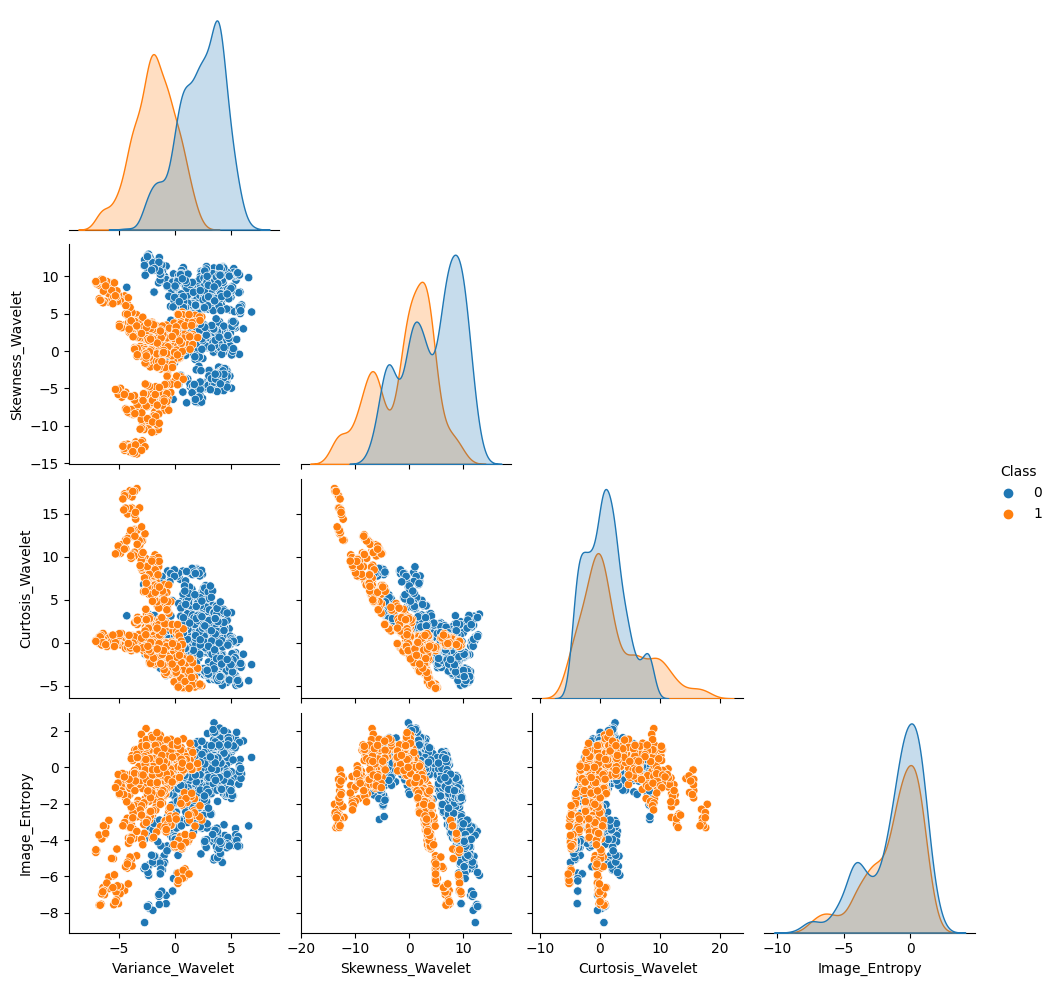

In [56]:
sns.pairplot(data, hue="Class", corner=True)

In [57]:
X = data.drop('Class', axis='columns')
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [58]:
n_estimators = [64, 100, 128, 200]
max_features = [2, 3, 4]  # this is m, could be sqrt(p) but there are only 4 features, so we can enter int values manually
bootstrap = [True, False]
oob_score = [True, False] # will raise errors, oob score can only be obtained if bootstrap=True

param_grid = dict(
    n_estimators=n_estimators,
    max_features=max_features,
    bootstrap=bootstrap,
    oob_score=oob_score,
)

In [59]:
model = RandomForestClassifier()
grid = GridSearchCV(model, param_grid)

In [60]:
grid.fit(X_train, y_train)

d:\user\my_files\Python Projects\machine-learning\.venv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "d:\user\my_files\Python Projects\machine-learning\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\user\my_files\Python Projects\machine-learning\.venv\lib\site-packages\sklearn\ensemble\_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [61]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 128, 'oob_score': True}

In [62]:
model = RandomForestClassifier(max_features=2, n_estimators=100, bootstrap=True, oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.oob_score_

0.9931389365351629

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



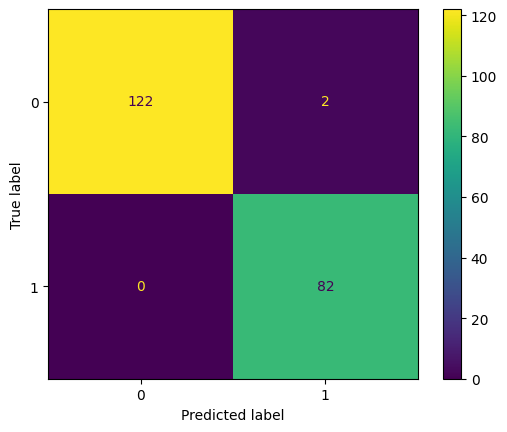

In [63]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(classification_report(y_test, y_pred))

In [64]:
errors = []
missclassifications = []

for n in range(1, 100):
    model = RandomForestClassifier(n_estimators=n, max_features=2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    e = 1 - accuracy_score(y_true=y_test, y_pred=y_pred)
    n_missed = np.sum(y_pred != y_test)
    
    errors.append(e)
    missclassifications.append(n_missed)
    

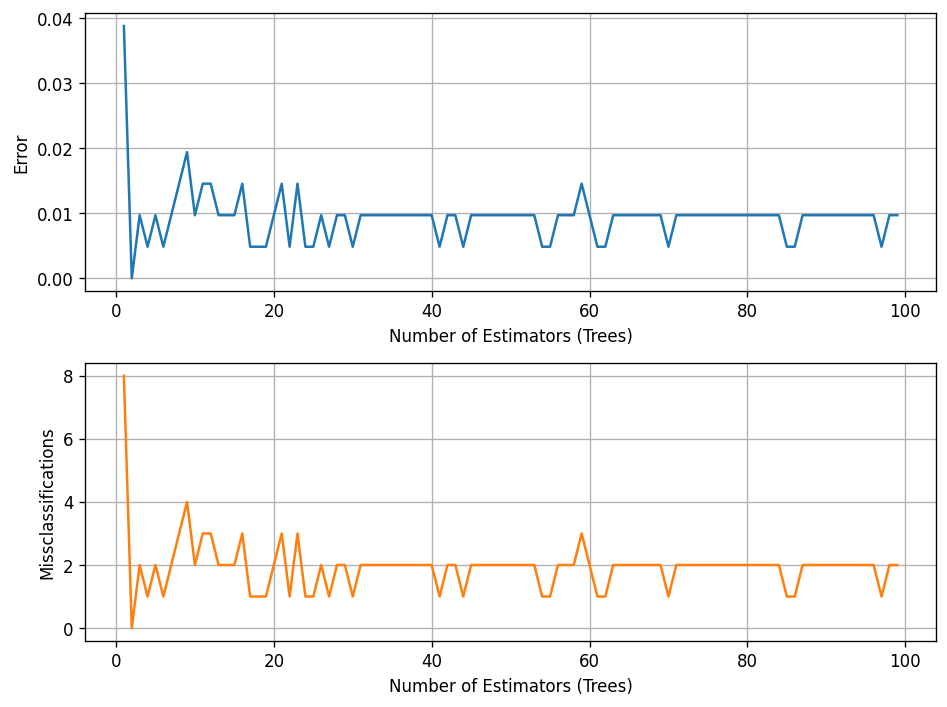

In [65]:
n = np.arange(1, 100)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,6), dpi=120)
ax1.plot(n, errors, 'tab:blue')
ax2.plot(n, missclassifications, 'tab:orange')

ax1.set_xlabel('Number of Estimators (Trees)')
ax2.set_xlabel('Number of Estimators (Trees)')

ax1.set_ylabel('Error')
ax2.set_ylabel('Missclassifications')

ax1.grid()
ax2.grid()
plt.tight_layout()
plt.show()

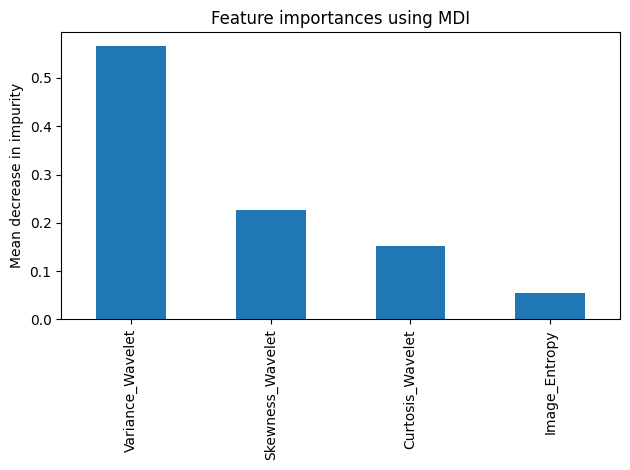

In [66]:
feature_importance = model.feature_importances_
forest_importances = pd.Series(feature_importance, index=X.columns)

std = np.std([feature_importance for tree in model.estimators_], axis=0)

lower_error = forest_importances - std/2
upper_error = forest_importances + std/2

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Random Forest Regression 

### Comparing Regression Models

In [67]:
data = pd.read_csv("data/rock_density_xray.csv")
display(data.head())

data.columns = ['Signal', 'Density']
data.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


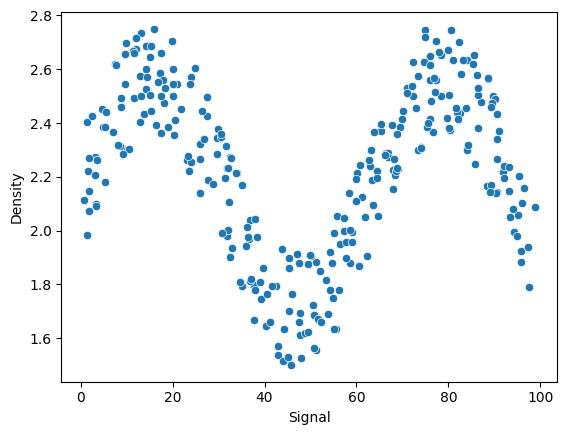

In [68]:
sns.scatterplot(data, x='Signal', y='Density')
plt.show()

In case $X$ is a single column (<code>pd.Series</code> instead of <code>pd.DataFrame</code>), it needs to be transformed to a numpy array (<code>X.values</code>) and reshaped into (-1, 1). If you try to fit $X$ and $y$ to a Scikit Learn model without reshaping it will raise an error and tell you how to reshape it. 

In [69]:
X = data['Signal']
y = data['Density']

X = X.values.reshape(-1, 1) 

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [71]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [73]:
y_pred_linear = linear_model.predict(X_test)
y_pred_linear

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

At first glance the error evaluation may seem quite good. The average value is 2.2, and the average error is about 0.2 (10%), which is not great but not terrible either.

In [79]:
def error_evaluation(y_test, y_test_predictions):
    MAE = mean_absolute_error(y_test, y_test_predictions)
    RMSE = np.sqrt(mean_squared_error(y_test, y_test_predictions))
    print(f'MAE = {round(MAE, 2)}')
    print(f'RMSE = {round(RMSE, 2)}')

In [80]:
error_evaluation(y_test, y_pred_linear)

MAE = 0.21
RMSE = 0.26


However if you plot the linear model predictions, you can see that it simply draws a linear line, which on average results in an acceptable error, but is clearly a poor predictor.

In [128]:
def run_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    MAE = mean_absolute_error(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f'MAE = {round(MAE, 2)}')
    print(f'RMSE = {round(RMSE, 2)}')
    
    
    signal_range = np.linspace(0, 100, 250)
    density_prediction = model.predict(signal_range.reshape(-1, 1))
    
    plt.figure(figsize=(12, 8), dpi=150)
    sns.scatterplot(data, x='Signal', y='Density', s=3, color='k')
    plt.plot(signal_range, density_prediction, 'tab:red', lw=1)
    plt.show()
    

MAE = 0.21
RMSE = 0.26


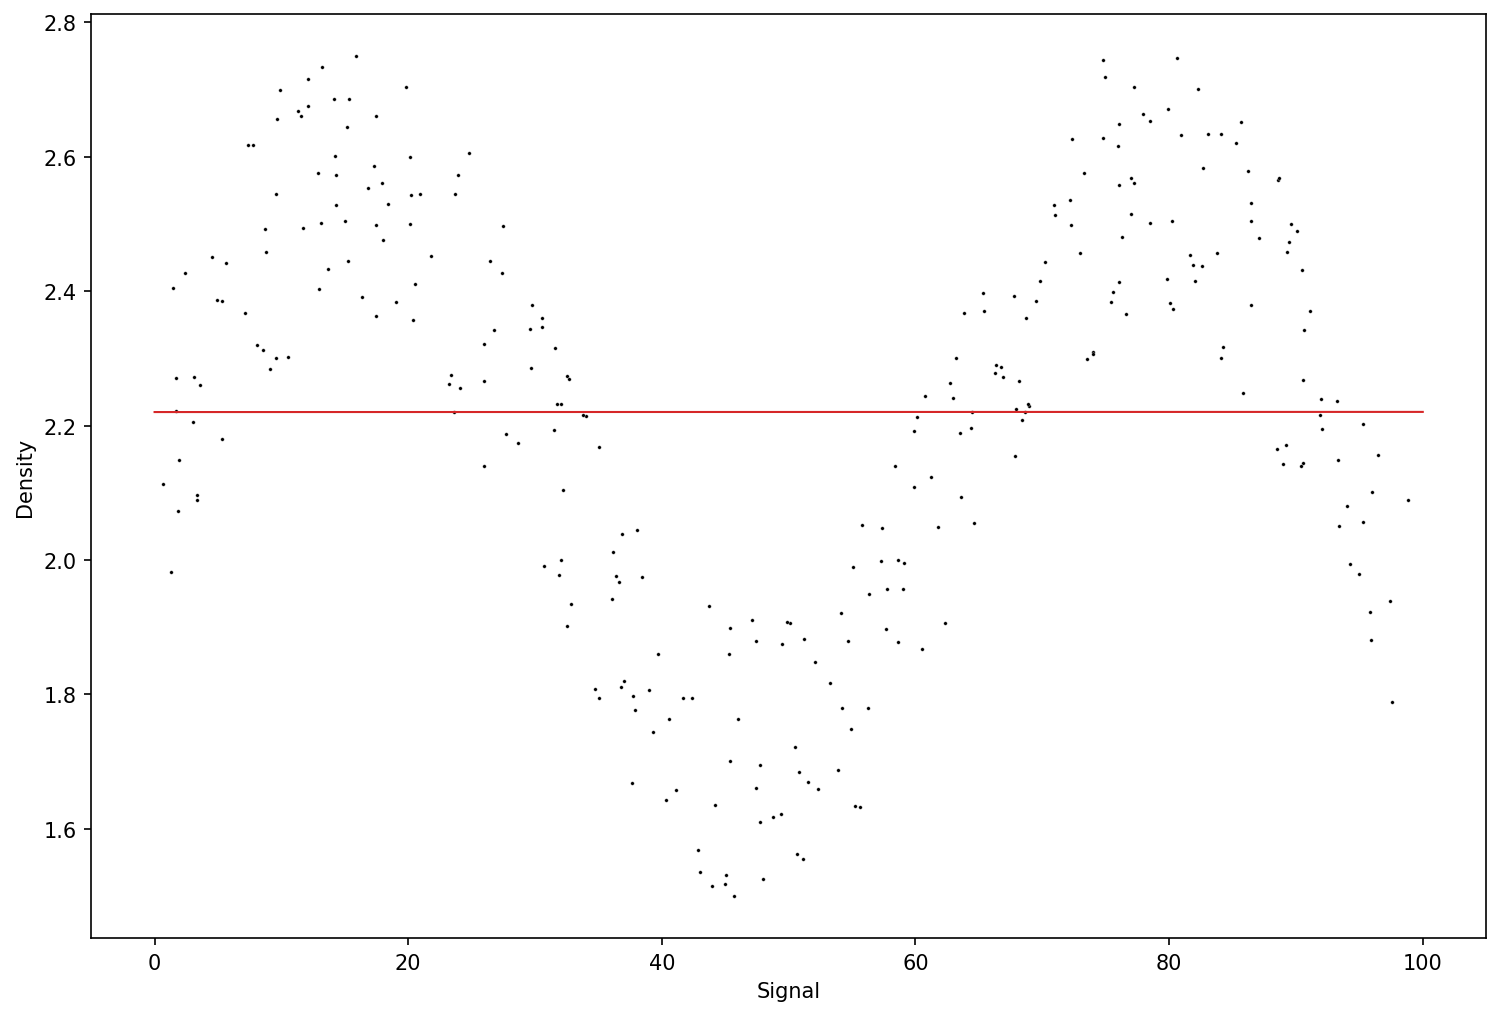

In [135]:
run_model(model=LinearRegression(), X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

MAE = 0.23
RMSE = 0.28


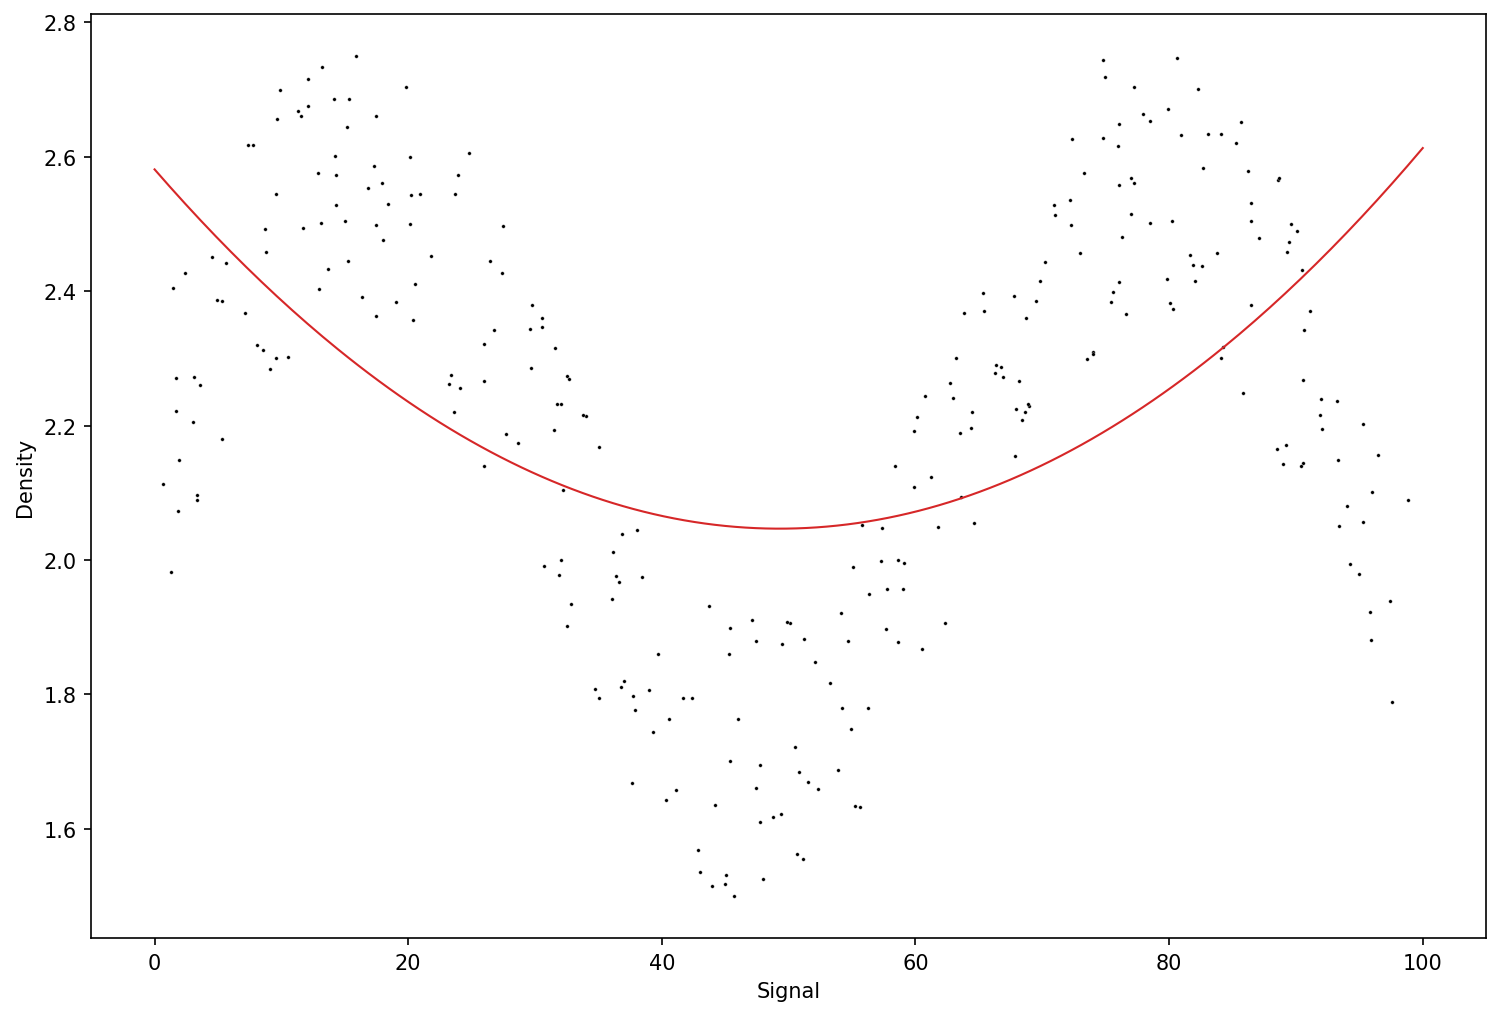

In [129]:
polynomial_regression = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
run_model(model=polynomial_regression, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

MAE = 0.12
RMSE = 0.14


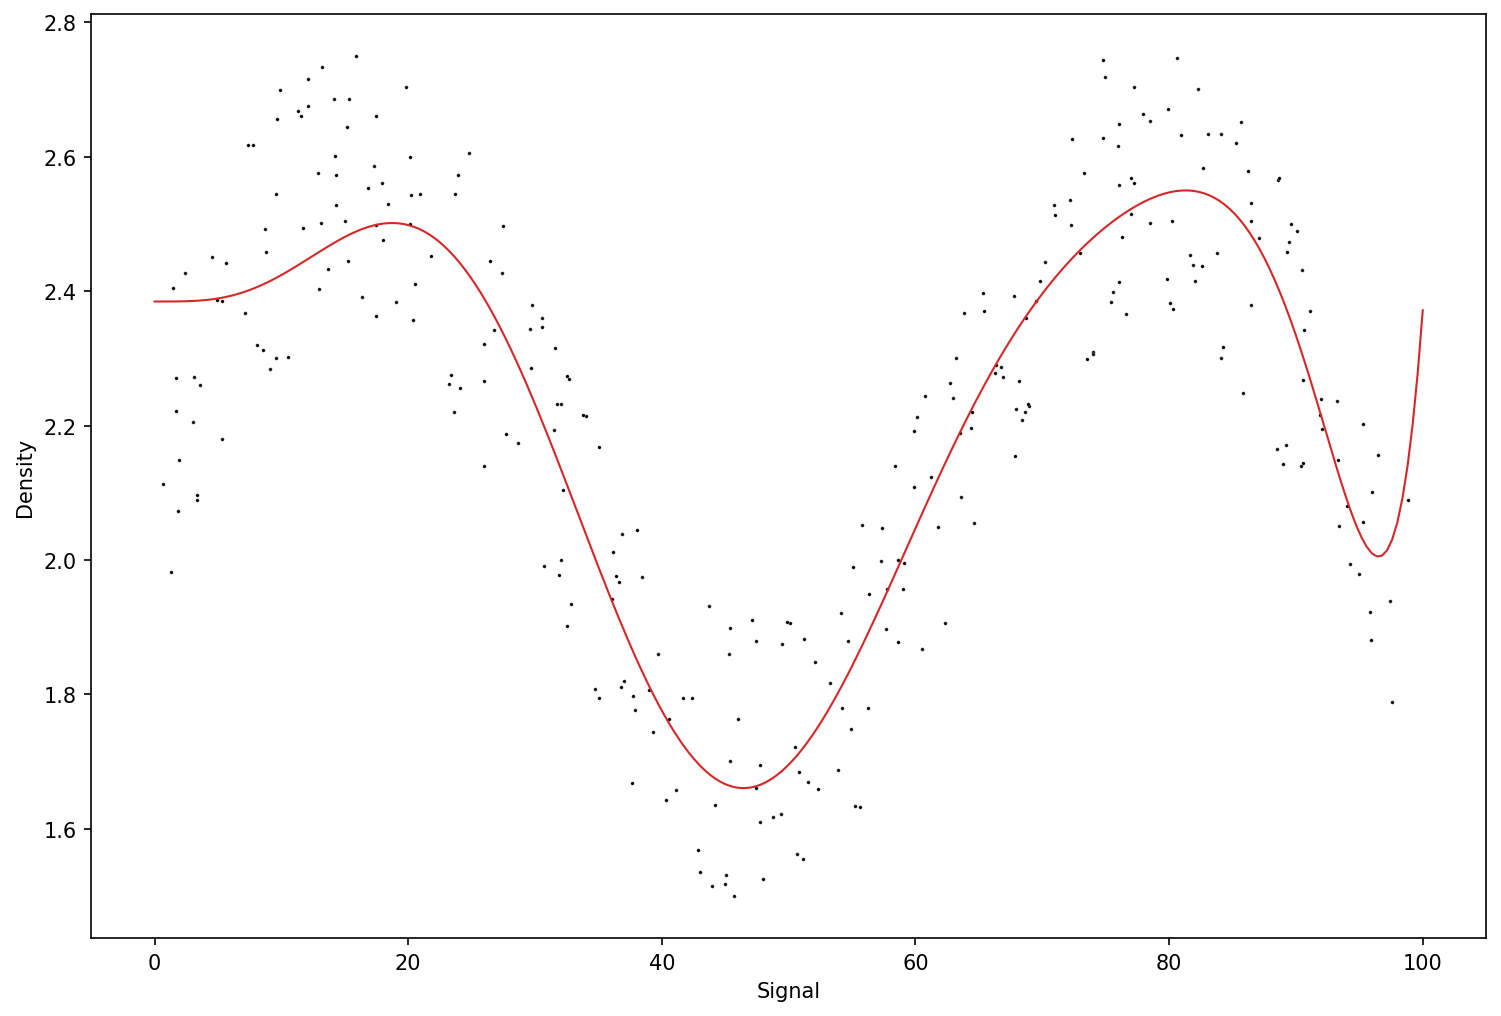

In [134]:
polynomial_regression = make_pipeline(PolynomialFeatures(degree=10), LinearRegression())
run_model(model=polynomial_regression, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

MAE = 0.12
RMSE = 0.15


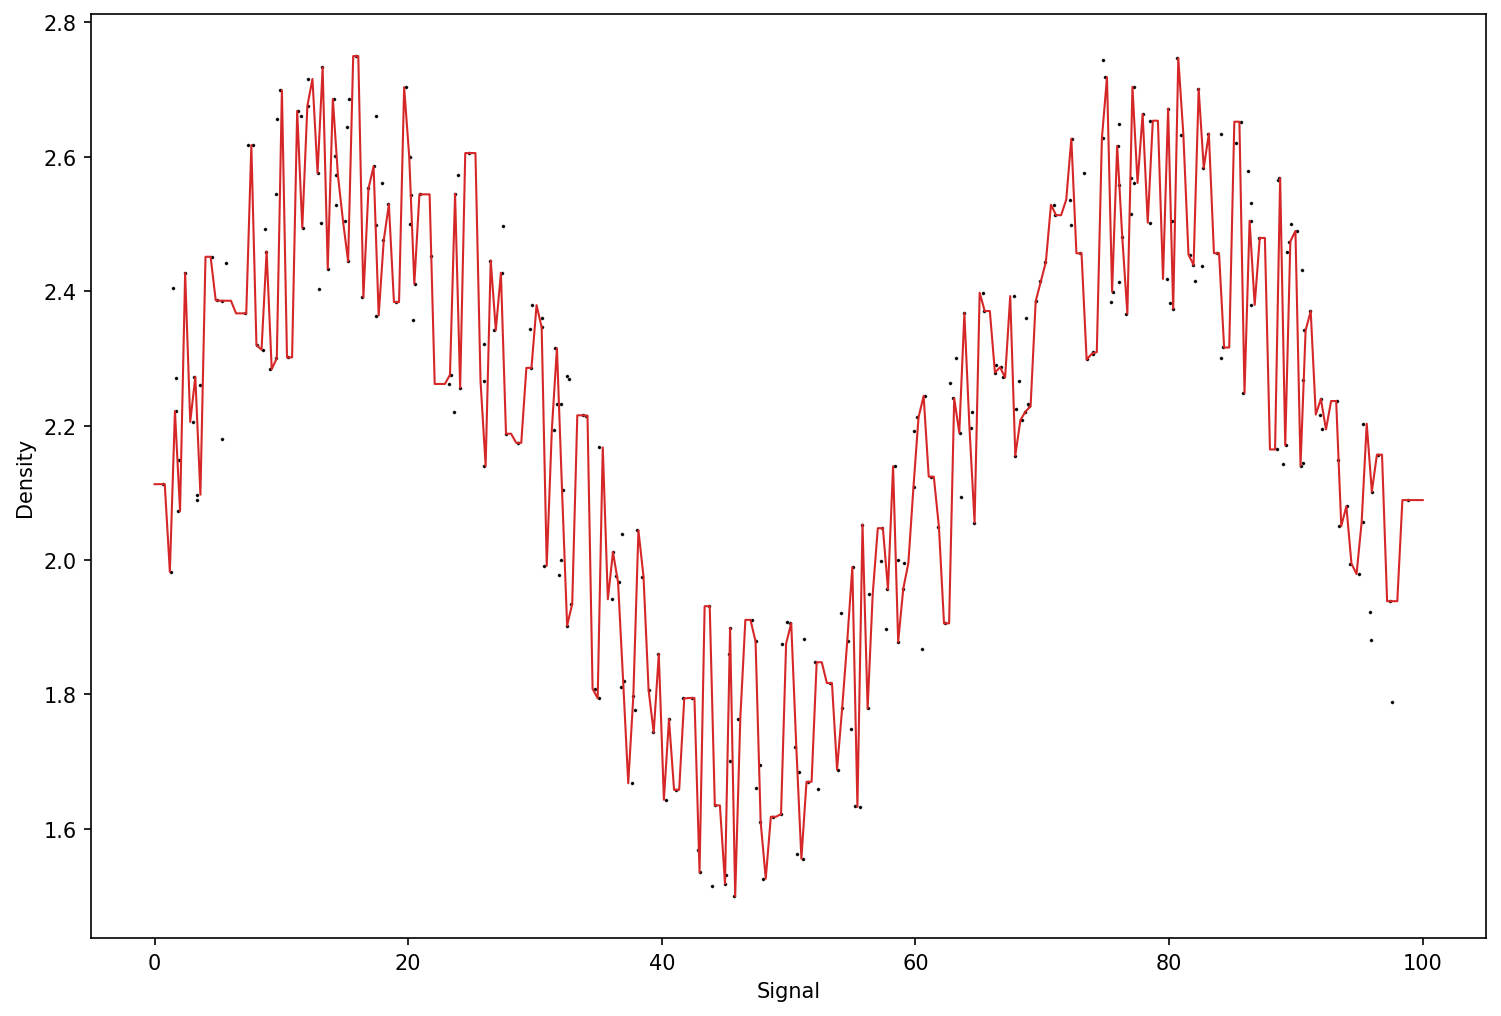

MAE = 0.12
RMSE = 0.14


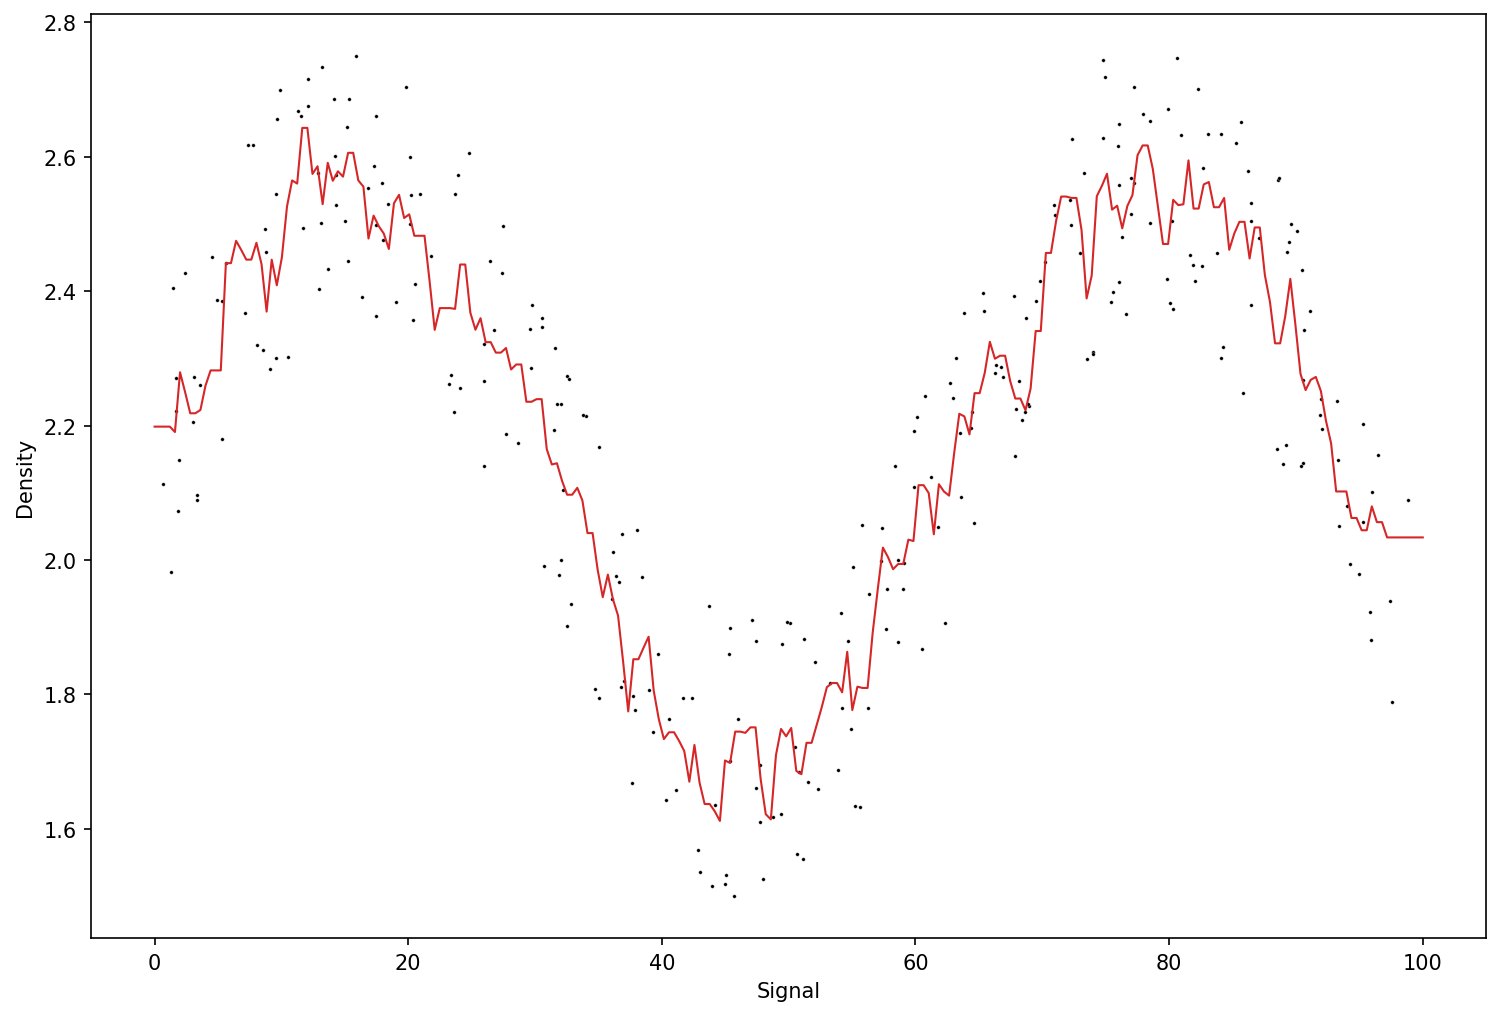

MAE = 0.12
RMSE = 0.13


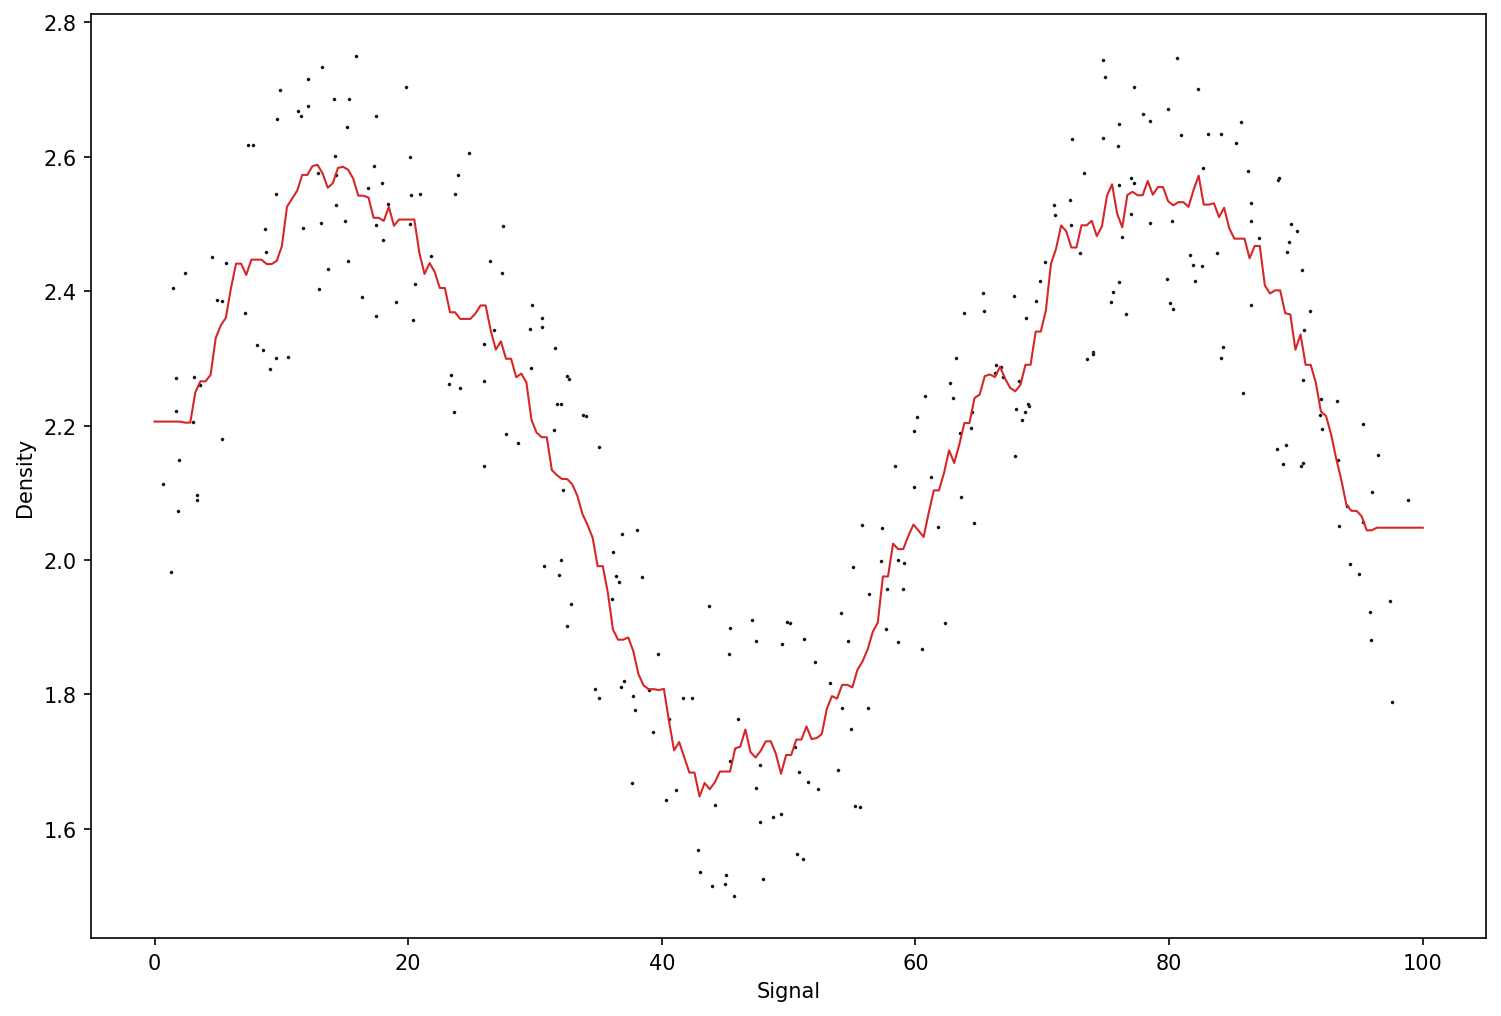

MAE = 0.12
RMSE = 0.14


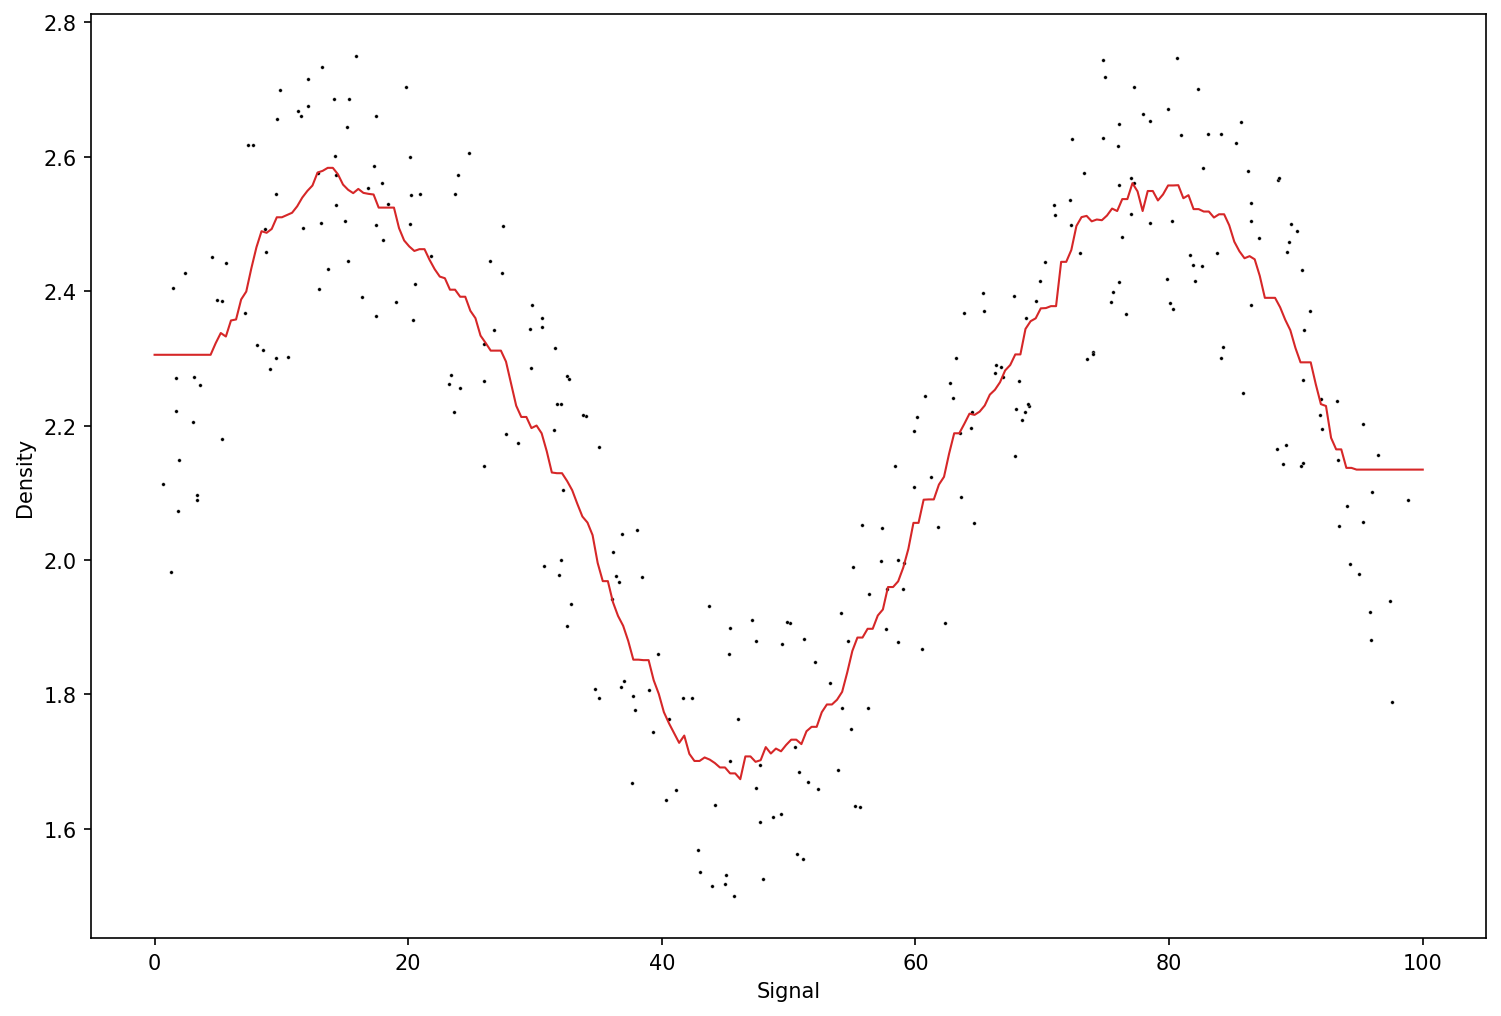

In [139]:
k_values = [1, 5, 10, 20]

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    run_model(model=model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


MAE = 0.11
RMSE = 0.13


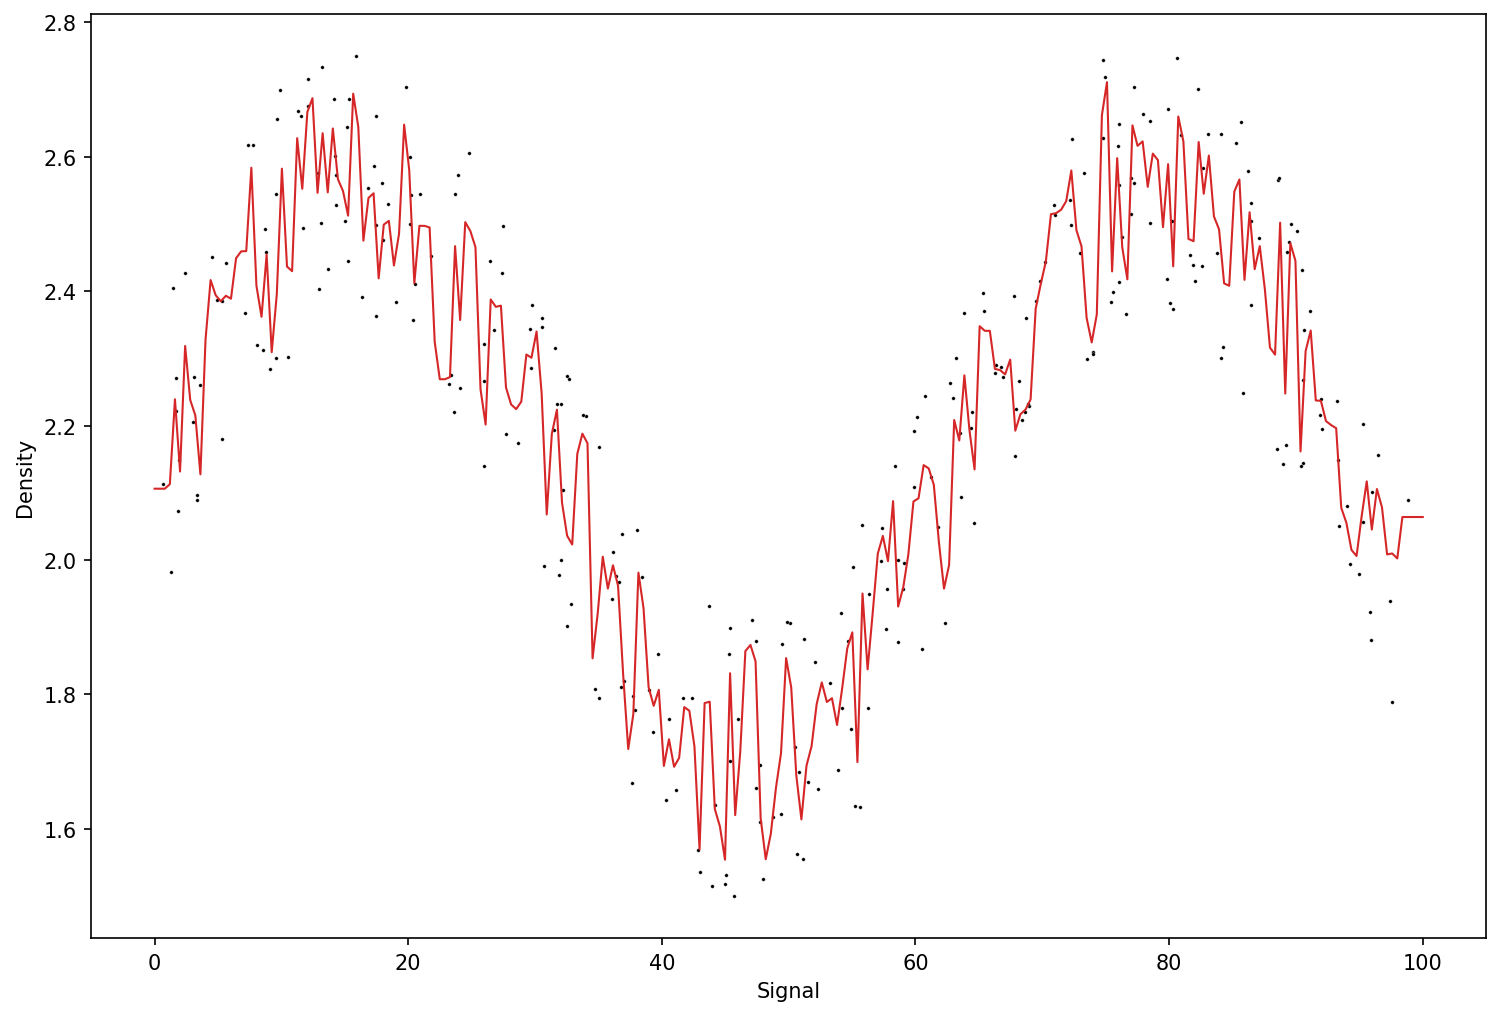

In [141]:
model = RandomForestRegressor()
run_model(model=model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


MAE = 0.11
RMSE = 0.13


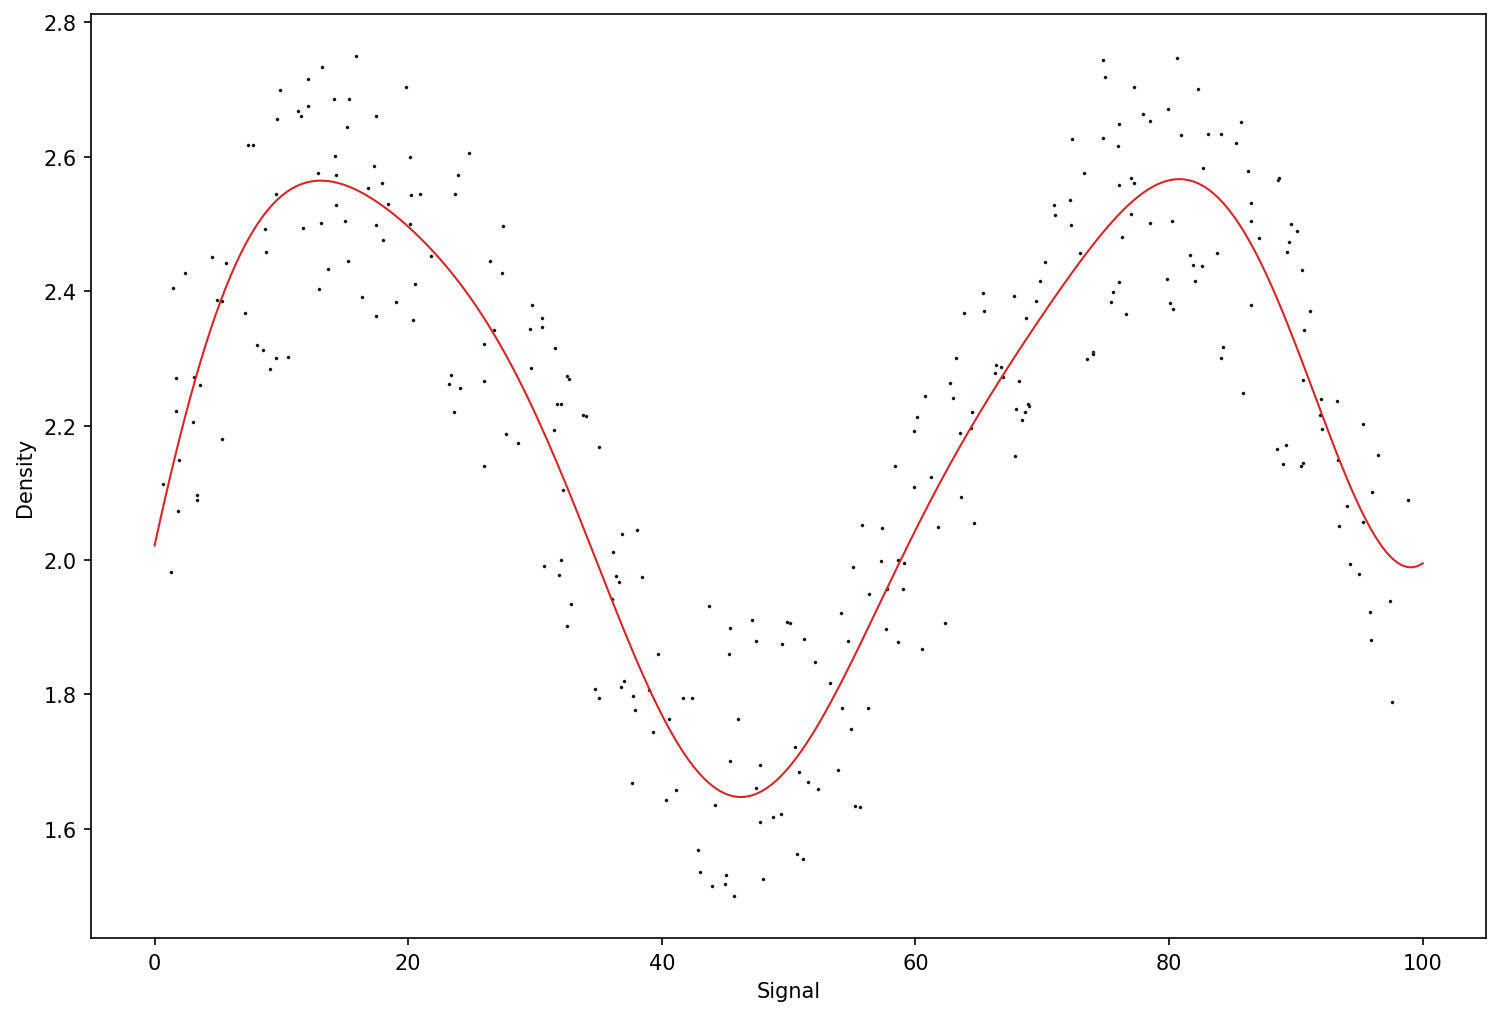

In [143]:
param_grid = {'C': [0.01, 0.1, 1, 5, 10, 100, 1000], 'gamma': ['auto', 'scale']}
svr_grid = GridSearchCV(estimator=SVR(), param_grid=param_grid)
run_model(model=svr_grid, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)